Data loaded successfully.
DataFrame shape: (1407328, 6)

Displaying initial sentiment distributions...


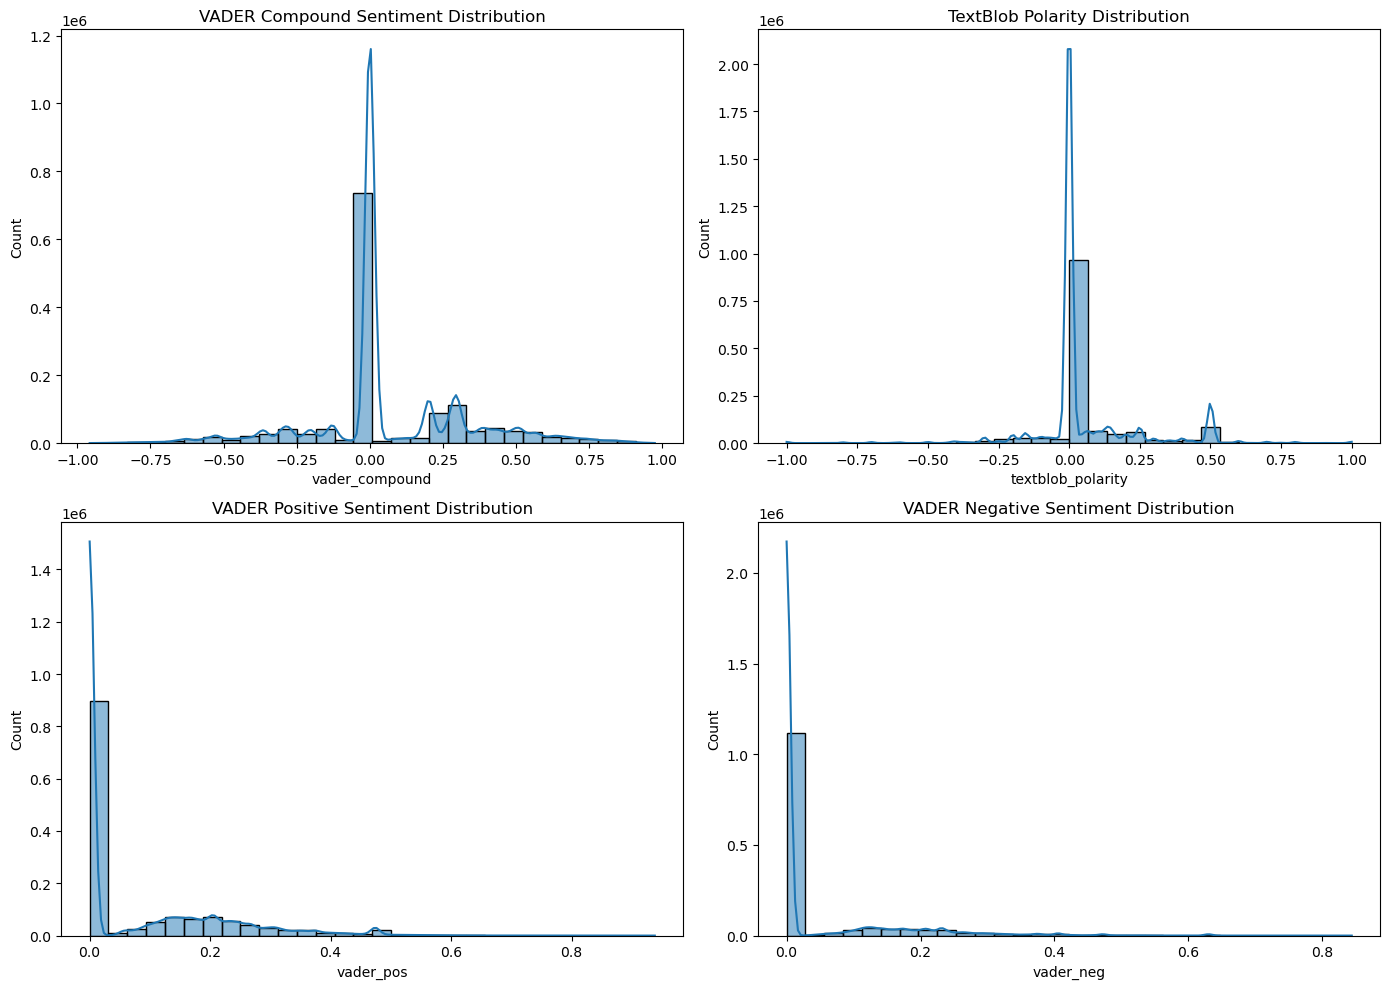


Sentiment by Publisher (Top 10 by headline count):


,vader_compound_mean,textblob_polarity_mean,headline_count
publisher,,,
Paul Quintaro,0.088070,0.019634,228373
Lisa Levin,0.012837,0.068258,186979
Benzinga Newsdesk,0.060382,0.042078,150484
Charles Gross,0.115490,0.031931,96732
Monica Gerson,0.061598,0.155478,82380
Eddie Staley,0.090730,0.022010,57254
Hal Lindon,0.102835,0.026074,49047
ETF Professor,0.051178,0.053748,28489
Juan Lopez,-0.012932,0.016380,28438



Sentiment by Stock (Top 10 by headline count - Original Method):


,vader_compound_mean,textblob_polarity_mean,headline_count
stock,,,
MRK,0.058959,0.059535,3333
MS,0.047224,0.052352,3238
NVDA,0.077290,0.073802,3146
MU,0.066355,0.063510,3142
QQQ,-0.005687,-0.011137,3106
NFLX,0.093104,0.082308,3028
M,0.073472,0.052114,3025
EBAY,0.090082,0.060013,3018
GILD,0.091442,0.062705,2968


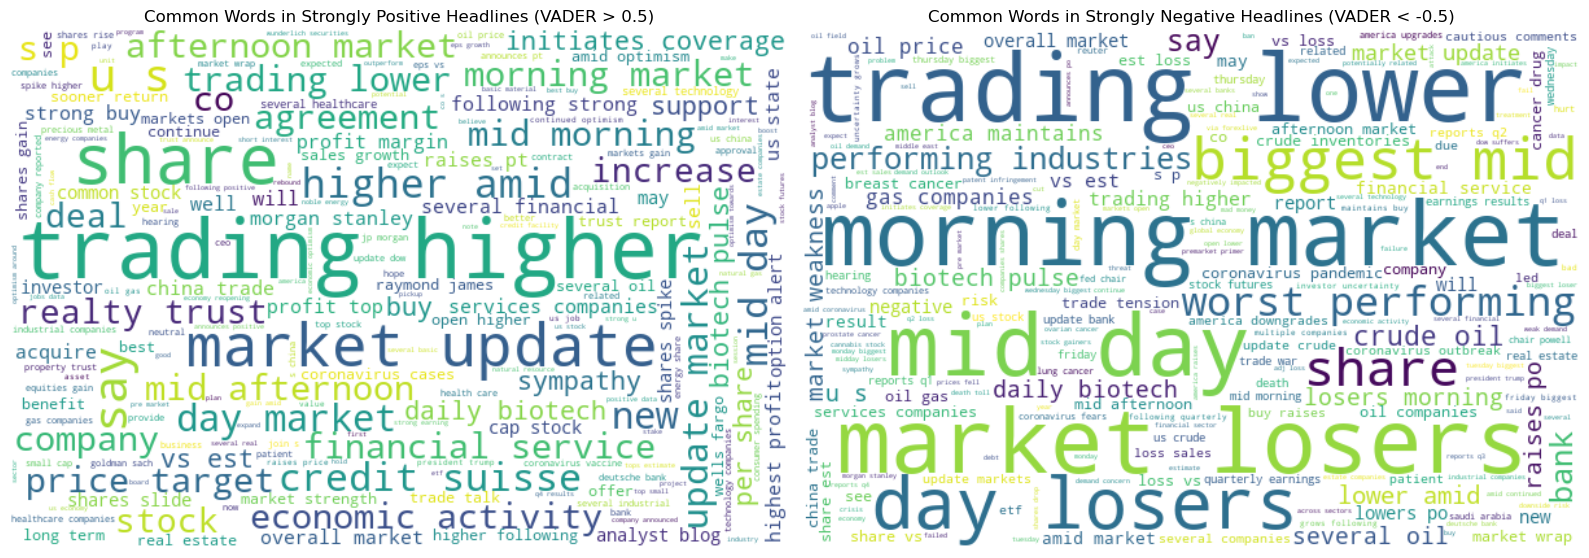


'sentiment_class' column created. Value counts:
sentiment_class
neutral     739134
positive    441675
negative    226519
Name: count, dtype: int64

Binary sentiment flags (is_positive, is_negative, is_neutral) created.

Enhanced sentiment features (sentiment_intensity, strong_positive, strong_negative) created.

Displaying Sentiment Distribution Dashboard...


/var/folders/bz/7lgvnms53rb0b9gts6t8n8m00000gn/T/ipykernel_12966/20333649.py:257: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


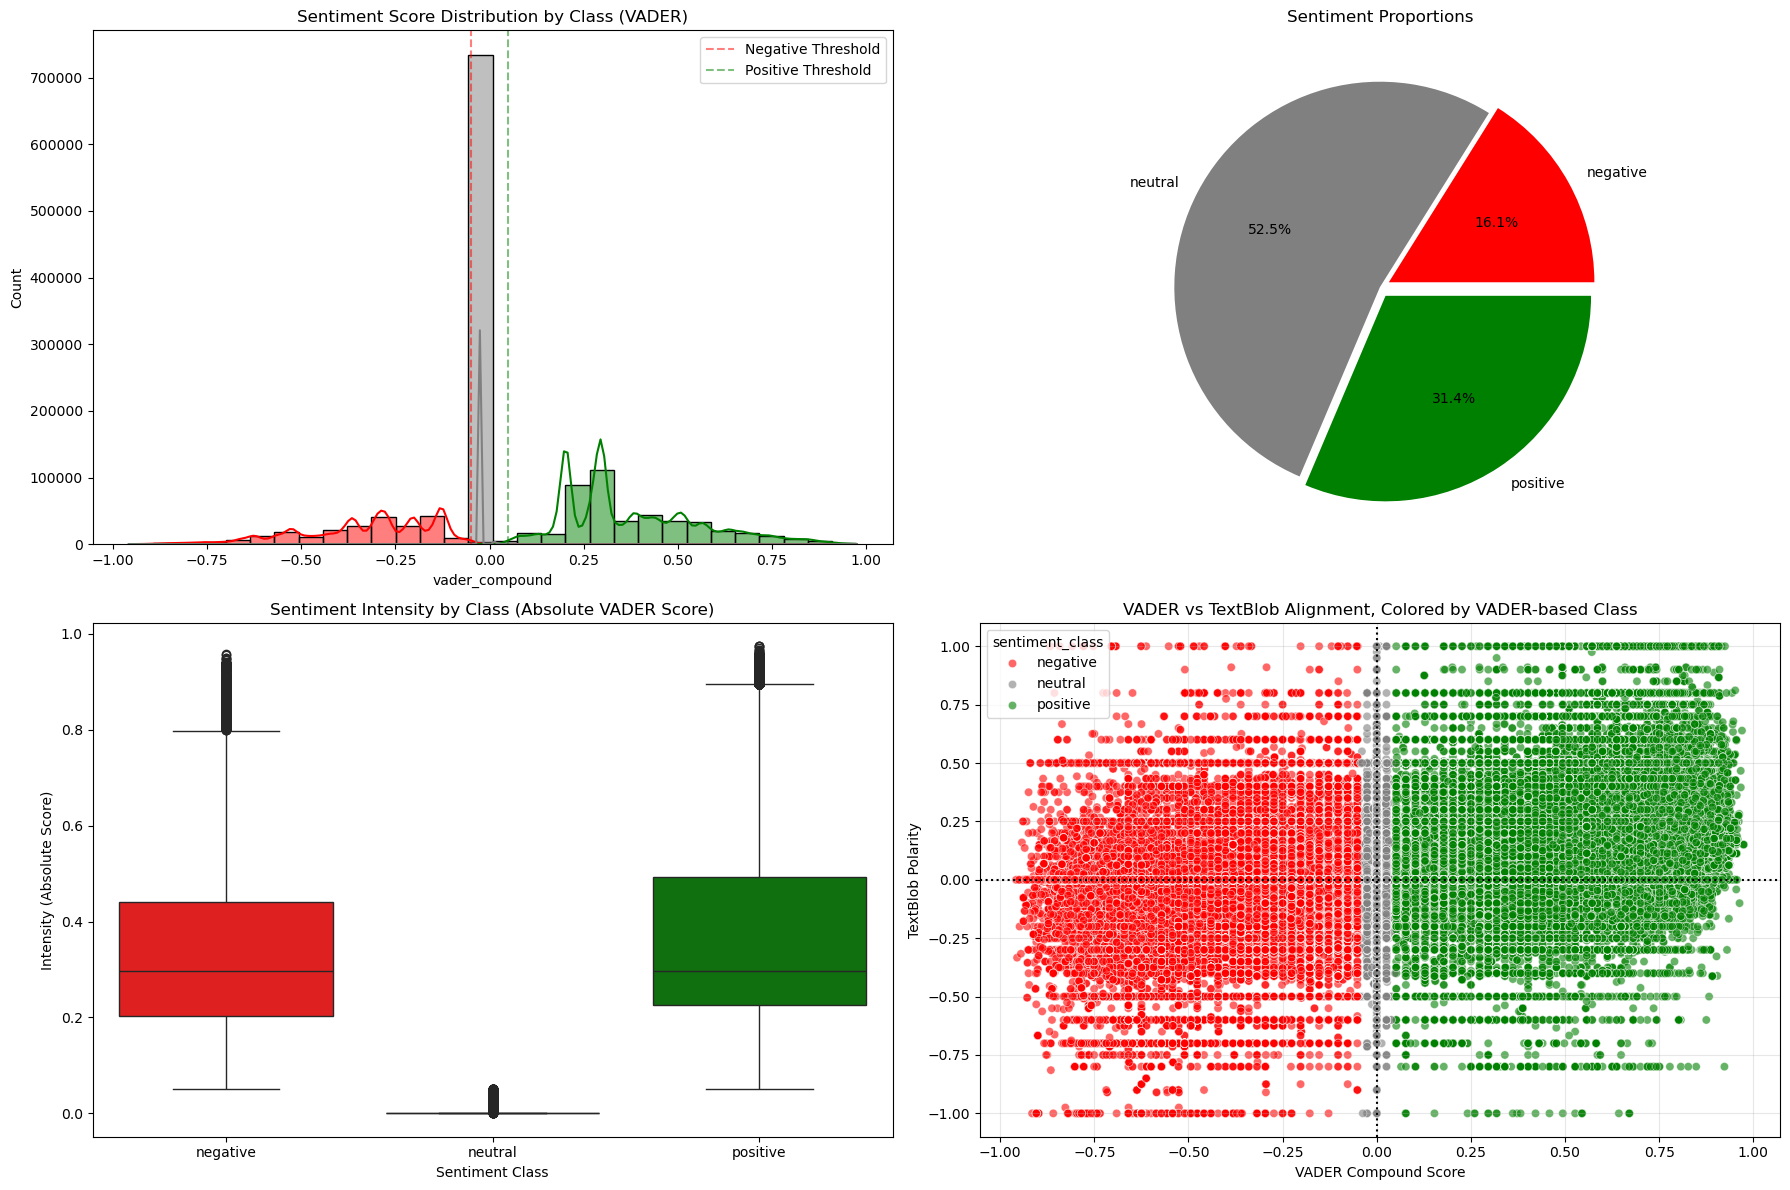


Analyzing temporal sentiment trends...


/var/folders/bz/7lgvnms53rb0b9gts6t8n8m00000gn/T/ipykernel_12966/20333649.py:273: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock_news['month_period'] = stock_news['date'].dt.to_period('M')


<Figure size 1400x700 with 0 Axes>

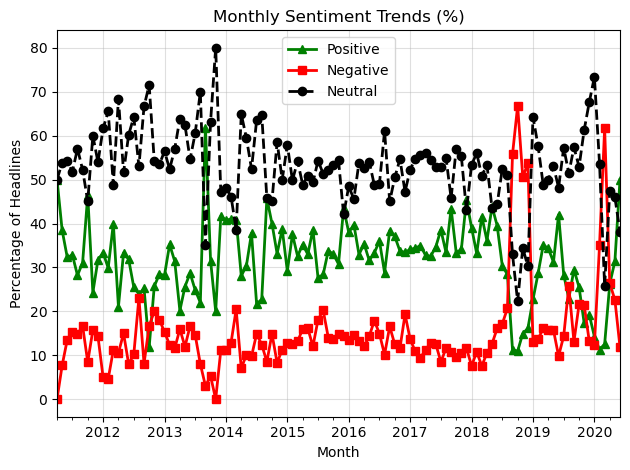


Analyzing sentiment for top 10 most mentioned stocks...


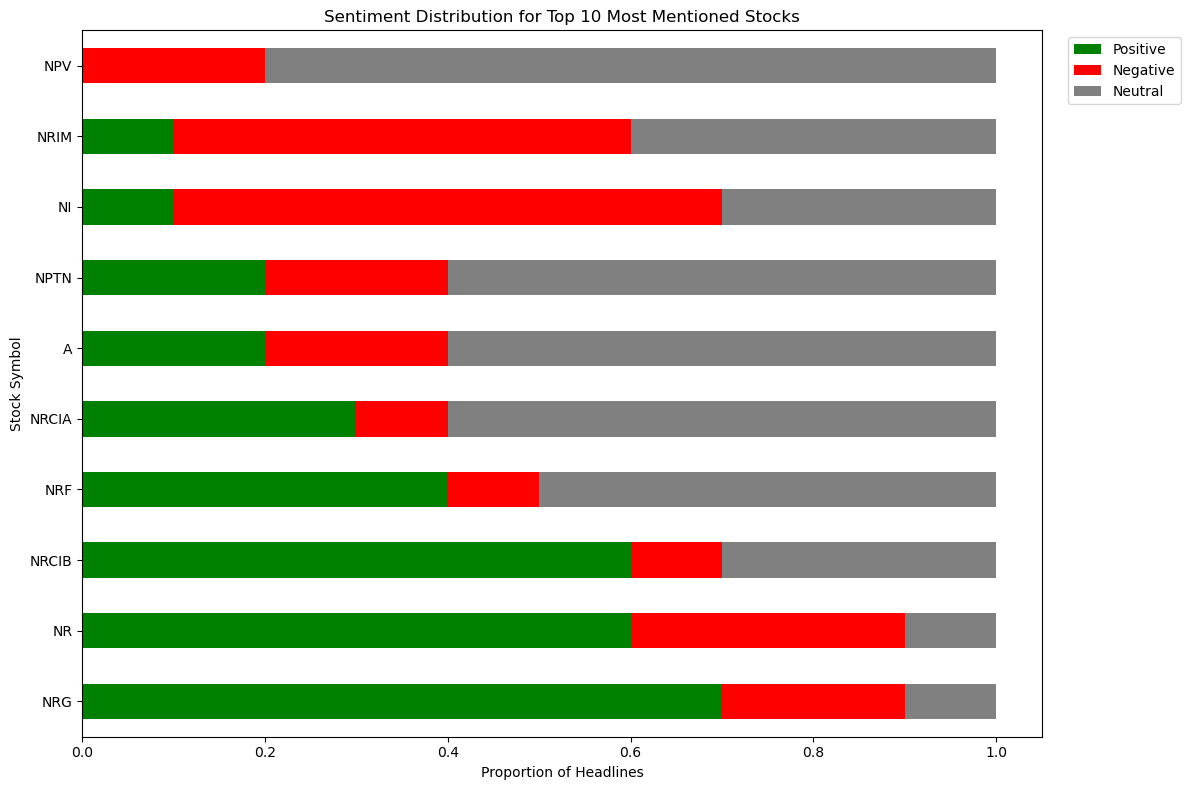


Performing Sentiment Lexicon Analysis...

Top 10 Positive Words (from lexicon analysis):
- optimism: 1685
- gain: 760
- strong: 739
- positive: 671
- trust: 371
- best: 114
- wins: 113
- precious: 96
- tops: 91
- outstanding: 78

Top 10 Negative Words (from lexicon analysis):
- crude: 415
- losers: 262
- cancer: 183
- negative: 141
- worst: 93
- war: 74
- crisis: 45
- bad: 31
- pain: 27
- disappointment: 24

Successfully saved enhanced dataset with sentiment features to ../../data/news/enhanced_analyst_ratings.csv


In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from src.utils.finantial_news_data_loader import load_csv_finantial_news_data

try:
    from src import load_csv_finantial_news_data
except ImportError:
    print("Warning: Could not import 'load_csv_finantial_data' from src.")
    print("Please ensure '../../src' is the correct path and 'load_csv_finantial_data' exists.")
    print("Falling back to a placeholder function for demonstration purposes.")
    def load_csv_finantial_data(path):
        print(f"Attempting to load data from: {path} with a placeholder loader.")
        try:

            df = pd.read_csv(path)
            if 'headline' not in df.columns:
                raise ValueError("CSV must contain a 'headline' column.")

            return df
        except FileNotFoundError:
            print(f"Error: The file {path} was not found.")
            print("Please ensure the data_path variable is set correctly.")
            sys.exit(1)
        except Exception as e:
            print(f"An error occurred while loading the data: {e}")
            sys.exit(1)



sys.path.append('../../src')


# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')


# Initialize sentiment analyzers
sia = SentimentIntensityAnalyzer()

# Download and load spaCy model
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load('en_core_web_sm')

# Define data path
data_path = '../../data/news/raw_analyst_ratings.csv'

# Load data using the (potentially placeholder) function
stock_news = load_csv_finantial_news_data(data_path)

# --- Functions from original script ---
def preprocess_text(text):
    """Basic text preprocessing"""
    text = str(text).lower()
    return text

def get_vader_sentiment(text):
    return sia.polarity_scores(text)

def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return {
        'polarity': analysis.sentiment.polarity,
        'subjectivity': analysis.sentiment.subjectivity
    }

# --- Apply preprocessing and initial sentiment analysis
stock_news['cleaned_headline'] = stock_news['headline'].apply(preprocess_text)
stock_news['vader_sentiment'] = stock_news['cleaned_headline'].apply(get_vader_sentiment)
stock_news['textblob_sentiment'] = stock_news['cleaned_headline'].apply(get_textblob_sentiment)

# Extract sentiment scores to separate columns
stock_news['vader_compound'] = stock_news['vader_sentiment'].apply(lambda x: x['compound'])
stock_news['vader_neg'] = stock_news['vader_sentiment'].apply(lambda x: x['neg'])
stock_news['vader_neu'] = stock_news['vader_sentiment'].apply(lambda x: x['neu'])
stock_news['vader_pos'] = stock_news['vader_sentiment'].apply(lambda x: x['pos'])
stock_news['textblob_polarity'] = stock_news['textblob_sentiment'].apply(lambda x: x['polarity'])
stock_news['textblob_subjectivity'] = stock_news['textblob_sentiment'].apply(lambda x: x['subjectivity'])



print("\nDisplaying initial sentiment distributions...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(stock_news['vader_compound'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('VADER Compound Sentiment Distribution')
sns.histplot(stock_news['textblob_polarity'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('TextBlob Polarity Distribution')
sns.histplot(stock_news['vader_pos'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('VADER Positive Sentiment Distribution')
sns.histplot(stock_news['vader_neg'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('VADER Negative Sentiment Distribution')
plt.tight_layout()
plt.show()

# Sentiment by publisher
if 'publisher' in stock_news.columns:
    publisher_sentiment = stock_news.groupby('publisher').agg(
        vader_compound_mean=('vader_compound', 'mean'),
        textblob_polarity_mean=('textblob_polarity', 'mean'),
        headline_count=('headline', 'count')
    ).sort_values('headline_count', ascending=False)
    print("\nSentiment by Publisher (Top 10 by headline count):")
    try:
        from IPython.display import display
        display(publisher_sentiment.head(10))
    except ImportError:
        print(publisher_sentiment.head(10))
else:
    print("\n'publisher' column not found. Skipping sentiment by publisher analysis.")


# Sentiment by stock
if 'stock' in stock_news.columns:
    stock_sentiment_orig = stock_news.groupby('stock').agg(
        vader_compound_mean=('vader_compound', 'mean'),
        textblob_polarity_mean=('textblob_polarity', 'mean'),
        headline_count=('headline', 'count')
    ).sort_values('headline_count', ascending=False)
    print("\nSentiment by Stock (Top 10 by headline count - Original Method):")
    try:
        from IPython.display import display
        display(stock_sentiment_orig.head(10))
    except ImportError:
        print(stock_sentiment_orig.head(10))
else:
    print("\n'stock' column not found. Skipping original sentiment by stock analysis.")


# Word cloud for most common words
positive_text_wc = ' '.join(stock_news[stock_news['vader_compound'] > 0.5]['cleaned_headline'])
negative_text_wc = ' '.join(stock_news[stock_news['vader_compound'] < -0.5]['cleaned_headline'])

fig_wc, axes_wc = plt.subplots(1, 2, figsize=(16, 8))
if positive_text_wc.strip():
    wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text_wc)
    axes_wc[0].imshow(wordcloud_pos, interpolation='bilinear')
    axes_wc[0].set_title('Common Words in Strongly Positive Headlines (VADER > 0.5)')
else:
    axes_wc[0].text(0.5, 0.5, 'No strongly positive headlines found for word cloud.',
                    horizontalalignment='center', verticalalignment='center', transform=axes_wc[0].transAxes)
axes_wc[0].axis('off')

if negative_text_wc.strip():
    wordcloud_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_text_wc)
    axes_wc[1].imshow(wordcloud_neg, interpolation='bilinear')
    axes_wc[1].set_title('Common Words in Strongly Negative Headlines (VADER < -0.5)')
else:
    axes_wc[1].text(0.5, 0.5, 'No strongly negative headlines found for word cloud.',
                    horizontalalignment='center', verticalalignment='center', transform=axes_wc[1].transAxes)
axes_wc[1].axis('off')
plt.tight_layout()
plt.show()



# Define sentiment_class based on VADER compound score (CRITICAL STEP FOR NEW FEATURES)
# Thresholds for VADER: positive > 0.05, negative < -0.05, neutral otherwise
conditions = [
    (stock_news['vader_compound'] > 0.05),
    (stock_news['vader_compound'] < -0.05)
]
choices = ['positive', 'negative']
stock_news['sentiment_class'] = np.select(conditions, choices, default='neutral')
print(f"\n'sentiment_class' column created. Value counts:\n{stock_news['sentiment_class'].value_counts()}")


# 1. Create binary sentiment flags
stock_news['is_positive'] = (stock_news['sentiment_class'] == 'positive').astype(int)
stock_news['is_negative'] = (stock_news['sentiment_class'] == 'negative').astype(int)
stock_news['is_neutral'] = (stock_news['sentiment_class'] == 'neutral').astype(int)
print("\nBinary sentiment flags (is_positive, is_negative, is_neutral) created.")

# 2. Enhanced Sentiment Analysis Features
stock_news['sentiment_intensity'] = stock_news['vader_compound'].abs()
stock_news['strong_positive'] = ((stock_news['vader_compound'] > 0.5) &
                                 (stock_news['textblob_polarity'] > 0.3)).astype(int)
stock_news['strong_negative'] = ((stock_news['vader_compound'] < -0.5) &
                                 (stock_news['textblob_polarity'] < -0.3)).astype(int)
print("\nEnhanced sentiment features (sentiment_intensity, strong_positive, strong_negative) created.")

# 3. Sentiment Distribution Dashboard
print("\nDisplaying Sentiment Distribution Dashboard...")
plt.figure(figsize=(18, 12))

# Distribution Plot
plt.subplot(2, 2, 1)
sns.histplot(data=stock_news, x='vader_compound', hue='sentiment_class',
             palette={'negative':'red', 'neutral':'gray', 'positive':'green'},
             bins=30, kde=True)
plt.title('Sentiment Score Distribution by Class (VADER)')
plt.axvline(-0.05, color='red', linestyle='--', alpha=0.5, label='Negative Threshold')
plt.axvline(0.05, color='green', linestyle='--', alpha=0.5, label='Positive Threshold')
plt.legend()

# Proportion Plot
plt.subplot(2, 2, 2)
sentiment_proportions = stock_news['sentiment_class'].value_counts(normalize=True).sort_index()

defined_colors = {'negative':'red', 'neutral':'gray', 'positive':'green'}
pie_colors = [defined_colors[s_class] for s_class in sentiment_proportions.index if s_class in defined_colors]
pie_explode = [0.05 if s_class in ['positive', 'negative'] else 0 for s_class in sentiment_proportions.index]

sentiment_proportions.plot(kind='pie', autopct='%1.1f%%',
                           colors=pie_colors,
                           explode=pie_explode)
plt.title('Sentiment Proportions')
plt.ylabel('')

# Intensity Analysis
plt.subplot(2, 2, 3)
sns.boxplot(data=stock_news, x='sentiment_class', y='sentiment_intensity',
            hue='sentiment_class',
            order=['negative', 'neutral', 'positive'],
            palette={'negative':'red', 'neutral':'gray', 'positive':'green'},
            legend=False)
plt.title('Sentiment Intensity by Class (Absolute VADER Score)')
plt.xlabel('Sentiment Class')
plt.ylabel('Intensity (Absolute Score)')

# TextBlob Comparison
plt.subplot(2, 2, 4)
sns.scatterplot(data=stock_news, x='vader_compound', y='textblob_polarity',
                hue='sentiment_class', palette={'negative':'red', 'neutral':'gray', 'positive':'green'},
                hue_order=['negative', 'neutral', 'positive'],
                alpha=0.6)
plt.title('VADER vs TextBlob Alignment, Colored by VADER-based Class')
plt.xlabel('VADER Compound Score')
plt.ylabel('TextBlob Polarity')
plt.axvline(0, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Temporal Sentiment Trends
if 'date' in stock_news.columns:
    print("\nAnalyzing temporal sentiment trends...")
    try:
        # Attempt to convert to datetime, handling potential errors
        stock_news['date'] = pd.to_datetime(stock_news['date'], errors='coerce')
        # Drop rows where date conversion failed
        stock_news.dropna(subset=['date'], inplace=True)

        if not stock_news.empty:
            stock_news['month_period'] = stock_news['date'].dt.to_period('M')

            monthly_sentiment = stock_news.groupby('month_period')[
                ['is_positive', 'is_negative', 'is_neutral']
            ].mean().mul(100)

            if not monthly_sentiment.empty:
                plt.figure(figsize=(14, 7))
                monthly_sentiment.plot(kind='line', style=['g-^', 'r-s', 'k--o'], linewidth=2)
                plt.title('Monthly Sentiment Trends (%)')
                plt.ylabel('Percentage of Headlines')
                plt.xlabel('Month')
                plt.legend(['Positive', 'Negative', 'Neutral'])
                plt.grid(True, alpha=0.4)
                plt.tight_layout()
                plt.show()
            else:
                print("No data available for monthly sentiment trends after processing.")
        else:
            print("No valid date entries found to analyze temporal trends.")
    except Exception as e:
        print(f"Could not analyze temporal trends: {e}")
else:
    print("\n'date' column not found. Skipping temporal sentiment trends analysis.")


# 5. Sentiment by Stock Analysis
if 'stock' in stock_news.columns:
    print("\nAnalyzing sentiment for top 10 most mentioned stocks...")
    top_stocks_count = stock_news['stock'].value_counts()
    if not top_stocks_count.empty:
        top_stocks = top_stocks_count.head(10).index
        stock_sentiment_enhanced = stock_news[stock_news['stock'].isin(top_stocks)].groupby('stock')[
            ['is_positive', 'is_negative', 'is_neutral']
        ].mean().sort_values('is_positive', ascending=False) # Proportions

        if not stock_sentiment_enhanced.empty:
            stock_sentiment_enhanced.plot(kind='barh', stacked=True,
                                          color=['green', 'red', 'gray'], # Positive, Negative, Neutral
                                          figsize=(12, 8))
            plt.title('Sentiment Distribution for Top 10 Most Mentioned Stocks')
            plt.xlabel('Proportion of Headlines')
            plt.ylabel('Stock Symbol')
            plt.legend(['Positive', 'Negative', 'Neutral'], bbox_to_anchor=(1.02, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
        else:
            print("No data available for enhanced stock sentiment analysis.")
    else:
        print("No stock data to analyze for top 10.")
else:
    print("\n'stock' column not found. Skipping enhanced sentiment by stock analysis.")


# 6. Sentiment Lexicon Analysis
print("\nPerforming Sentiment Lexicon Analysis...")
def get_sentiment_words(text, sentiment_type, threshold=0.5):
    doc = nlp(str(text))
    words = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.text.isalpha():
            score = sia.polarity_scores(token.text)['compound']
            if sentiment_type == 'positive' and score >= threshold:
                words.append(token.text)
            elif sentiment_type == 'negative' and score <= -threshold:
                words.append(token.text)
    return words

positive_words_lexicon = Counter()
negative_words_lexicon = Counter()

# Iterate safely, checking if 'cleaned_headline' exists and is not NaN
if 'cleaned_headline' in stock_news.columns:
    for _, row in stock_news.iterrows():
        headline_text = row['cleaned_headline']
        if pd.notna(headline_text):
            if row['is_positive']:
                positive_words_lexicon.update(get_sentiment_words(headline_text, 'positive'))
            elif row['is_negative']:
                negative_words_lexicon.update(get_sentiment_words(headline_text, 'negative'))

    print("\nTop 10 Positive Words (from lexicon analysis):")
    for word, count in positive_words_lexicon.most_common(10):
        print(f"- {word}: {count}")

    print("\nTop 10 Negative Words (from lexicon analysis):")
    for word, count in negative_words_lexicon.most_common(10):
        print(f"- {word}: {count}")
else:
    print("'cleaned_headline' column not found. Skipping lexicon analysis.")


# 7. Save Enhanced Dataset
output_path = '../../data/news/enhanced_analyst_ratings.csv'
try:
    stock_news.to_csv(output_path, index=False)
    print(f"\nSuccessfully saved enhanced dataset with sentiment features to {output_path}")
except Exception as e:
    print(f"\nError saving dataset to {output_path}: {e}")
